In [46]:
import os                                               #os interface library 
import requests                                         #HTTP requests library
import pandas as pd                                     #panda library
from dotenv import load_dotenv                          #dotenv library to read keys and secrect key for api
import alpaca_trade_api as trade_api                    #Alpaca library
from MCForecastTools import MCSimulation                #Monta Carlos simulation apis
import json                                             #JSON library ro work with JSON objects
from datetime import date                               #Data-Time library
import numpy as np                 

#set the backend of matplotlib to the 'inline' backend 
%matplotlib inline 
# Load .env enviroment variables
load_dotenv()
True
def setting_api():
    alpaca_api_key=os.getenv("ALPACA_API_KEY")
    alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")
    alpaca = trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')
    return alpaca
    

In [21]:
# # Function for retrieving data relative to tickers/portfolio
def portfolio_data(tickers):
    today = date.today() + pd.DateOffset(years=-5)                        
    today = pd.Timestamp(today, tz="America/New_York").isoformat()  
    timeframe ='1Day'
    portfolio =alpaca.get_bars(tickers,timeframe,start=today,adjustment='raw').df
    portfolio.index = portfolio.index.date
    return portfolio
# function for retrieving data related to benchmark:
def bench_mark(symbol):
    bench_mark = portfolio_data(symbol)
    symbol = bench_mark[['close']].rename(columns = {'close': symbol})
    return symbol
# function to seperate the required data :
def format_data(symbol):
    ticker =portfolio[portfolio["symbol"]==symbol].drop("symbol", axis=1)
    closing_price = ticker[['close']]
    closing_price = closing_price.rename(columns={'close' : 'close'})
    return closing_price
# function for calculating cuumulative returns:
def cumulative_returns(data):
    data_returns = data.pct_change()
    data_cumulative = (1+data_returns).cumprod()
    return data_cumulative
# function for equally weghting stocks:
def equal_weights(data):
    weights = []
    for i in range(0,len(portfolio.columns)):
        w = 1/len(portfolio.columns)
        weights.append(w)
    return weights   


In [22]:
alpaca = setting_api()
tickers = ['APD', 'APH', 'RACE', 'TEL', 'IFF', 'GLW']
portfolio = portfolio_data(tickers)
portfolio.head()


,open,high,low,close,volume,trade_count,vwap,symbol
2017-04-13,135.33,135.5800,134.17,134.30,626943,7518,134.705681,APD
2017-04-17,134.78,135.8950,134.42,135.86,1092375,11416,135.497295,APD
2017-04-18,135.04,136.0200,134.72,135.27,701020,10116,135.259170,APD
2017-04-19,135.73,136.0399,134.78,134.96,577819,7170,135.166924,APD
2017-04-20,135.62,137.3400,135.20,136.90,985329,10779,136.676759,APD


In [23]:
apd =format_data('APD')
aph =format_data('APH')
race=format_data('RACE')
tel=format_data('TEL')
iff=format_data('IFF')
glw=format_data('GLW')
apd.head()

,close
2017-04-13,134.30
2017-04-17,135.86
2017-04-18,135.27
2017-04-19,134.96
2017-04-20,136.90


In [24]:
portfolio = pd.concat([apd,aph,race,tel,iff,glw],axis =1,keys = ['APD','APH','RACE','TEL','IFF','GLW'])
portfolio.head()

,APD,APH,RACE,TEL,IFF,GLW
,close,close,close,close,close,close
2017-04-13,134.30,68.65,70.63,71.93,131.94,26.32
2017-04-17,135.86,69.53,71.32,72.77,133.02,26.54
2017-04-18,135.27,69.96,70.59,73.08,134.07,26.89
2017-04-19,134.96,70.12,71.26,73.18,134.53,26.86
2017-04-20,136.90,70.82,71.40,74.12,135.80,27.11


In [25]:
spy = bench_mark('SPY')
spy.head()

,SPY
2017-04-13,232.51
2017-04-17,234.57
2017-04-18,233.87
2017-04-19,233.44
2017-04-20,235.34


<AxesSubplot:>

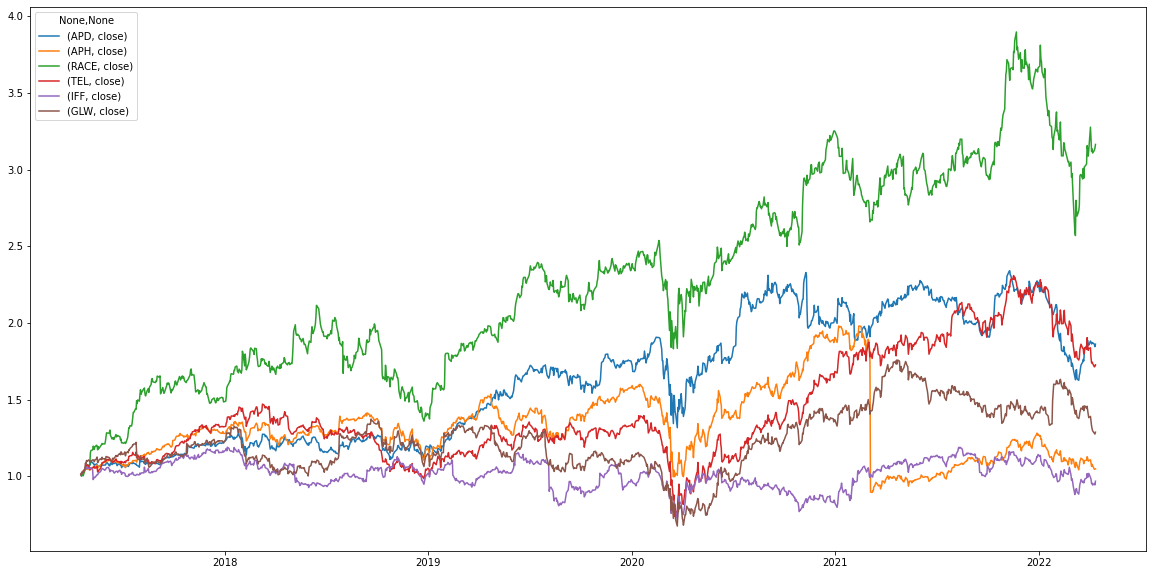

In [26]:
spy_cumulative = cumulative_returns(spy)
portfolio_cumulative = cumulative_returns(portfolio)
portfolio_cumulative.plot(figsize = (20,10))

<AxesSubplot:>

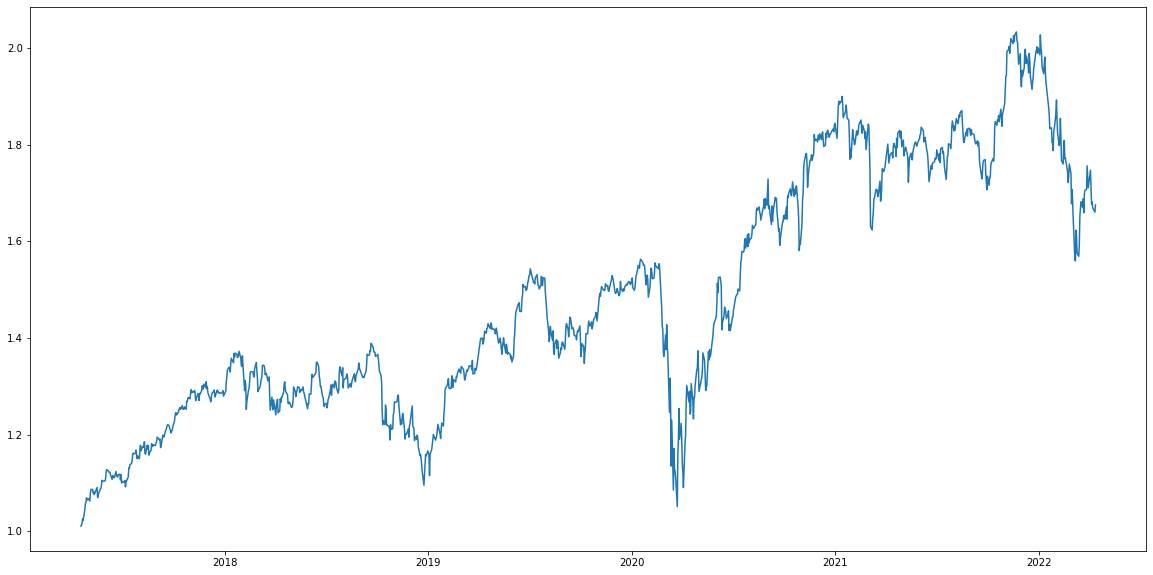

In [27]:
weights = equal_weights(portfolio)
portfolio_price_action = portfolio_cumulative.dot(weights)
portfolio_price_action.plot(figsize = (20,10))

In [39]:
#Concat the df and clean the data as well
comparison = pd.concat([portfolio_price_action,spy_cumulative],axis = 1 ,join = 'inner').dropna()
comparison = comparison.rename(columns = {0:'E.W Portfolio'})

<AxesSubplot:>

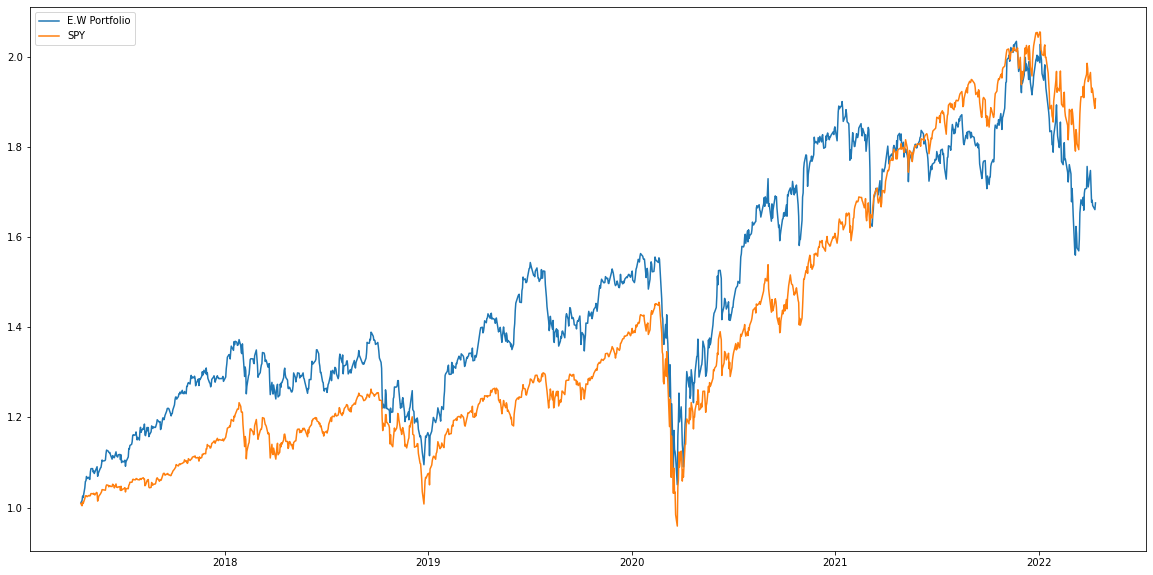

In [40]:
#Plot the comparison data
comparison.plot(figsize = (20,10))

In [41]:
#run Monte Carlos simulation 
sim_ew = MCSimulation(
    portfolio,
    weights=equal_weights(portfolio),
    num_simulation=1000,
    num_trading_days=252,
)

In [32]:
sim_ew.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\GitBash\Responsible_Investor\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990593,1.005181,0.997742,0.999074,1.004782,0.982681,0.994828,1.006551,0.993091,0.997975,...,1.005933,1.009413,1.001123,1.001171,1.000684,0.995651,0.998187,1.009656,1.003762,0.996467
2,0.992534,0.999828,0.989748,1.000402,1.005626,0.992347,0.991209,1.019497,1.004325,1.004124,...,1.014017,1.004460,1.001123,0.996792,1.003945,1.007625,1.008273,0.999830,0.996398,0.999706
3,1.000053,1.001324,0.988443,0.993180,0.999894,1.005354,1.002538,1.026571,1.013999,1.008516,...,1.009707,1.009116,1.007813,0.996023,1.006782,1.006147,1.027750,1.006551,0.981987,0.989775
4,0.998810,0.997313,0.992508,1.003551,1.002615,0.995849,0.999448,1.034203,1.025665,1.016037,...,1.006705,1.012219,1.015884,0.987443,1.009657,1.006279,1.022151,1.019052,0.987118,0.994630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.971587,0.994284,1.210477,1.111051,1.173197,1.193541,1.189112,1.259006,1.564970,1.337518,...,1.027238,1.069248,1.197832,1.181835,1.135465,1.176724,1.098300,1.086233,1.071116,1.270047
249,0.983283,0.995434,1.201604,1.119053,1.188451,1.177984,1.161782,1.268424,1.549634,1.330700,...,1.024729,1.058154,1.206866,1.187194,1.132764,1.167073,1.093478,1.103653,1.076878,1.276507
250,0.985739,0.993151,1.200855,1.120961,1.191639,1.179249,1.170412,1.274074,1.546770,1.336716,...,1.030089,1.055860,1.194274,1.203925,1.126732,1.183391,1.092118,1.111001,1.094528,1.291191
251,0.987151,0.985008,1.184123,1.118822,1.201801,1.174366,1.178732,1.263085,1.564688,1.346506,...,1.041988,1.047624,1.194977,1.209347,1.137018,1.186975,1.101942,1.111103,1.092711,1.269148


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

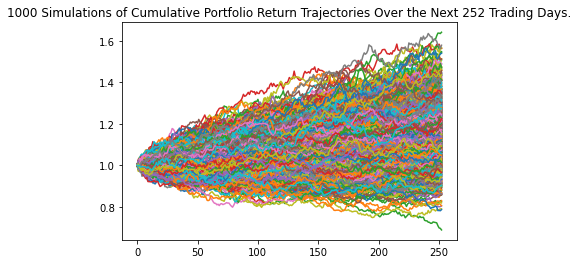

In [35]:
sim_ew.plot_simulation()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = sim_ew.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

# Set initial investment
initial_investment = 20000

# Using lower & upper CI to calculate the `95%` confidence intervalsfor investment of $20,000
ci_lower = round(summary_stats[8] * initial_investment, 2)
ci_upper = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.02f} in the portfolio"
      f" over a year will end within in the range of"
      f" ${ci_lower:,.02f} and ${ci_upper:,.02f}")

count           1000.000000
mean               1.143493
std                0.142605
min                0.688127
25%                1.042512
50%                1.134458
75%                1.235801
max                1.640845
95% CI Lower       0.894644
95% CI Upper       1.445655
Name: 252, dtype: float64
There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next years will end within in the range of $17,892.89 and $28,913.10


In [47]:
# Calculate volatility based on the MC stats
volatility = round(summary_stats[2] * np.sqrt(252) )
volatility

2

In [ ]:
# Annualized Sharpe Ratios
annualized_sharpe_ratio = (single_df.mean() * 252) / (single_df.std() * np.sqrt(252))
annualized_sharpe_ratio


In [48]:
comparison

,E.W Portfolio,SPY
2017-04-17,1.010404,1.008860
2017-04-18,1.013254,1.005849
2017-04-19,1.015462,1.004000
2017-04-20,1.025265,1.012172
2017-04-21,1.022195,1.008946
...,...,...
2022-04-07,1.681467,1.930111
2022-04-08,1.669552,1.924949
2022-04-11,1.662604,1.892048
2022-04-12,1.660538,1.885037
